# Iris Classification Project

## import libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset

In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data[:, :2]
y = dataset.target

In [3]:
pd.DataFrame(X).head(10)

,0,1
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
print(dataset.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print(dataset.target_names)

['setosa' 'versicolor' 'virginica']


## Spilting dataset into traing set and test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the model

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Predicting the model

In [9]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("Accuracy Score: {} %".format(accuracy_score(y_test, y_pred)* 100))

Accuracy Score: 90.0 %


## Visualization

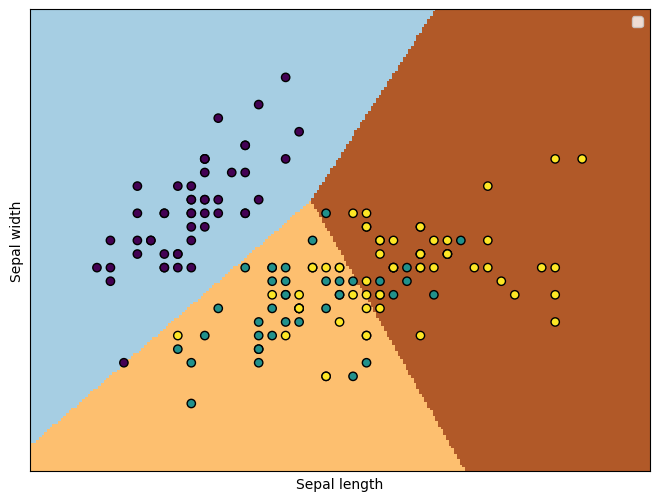

In [12]:
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class labels for the mesh grid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.viridis)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.legend()

plt.show()

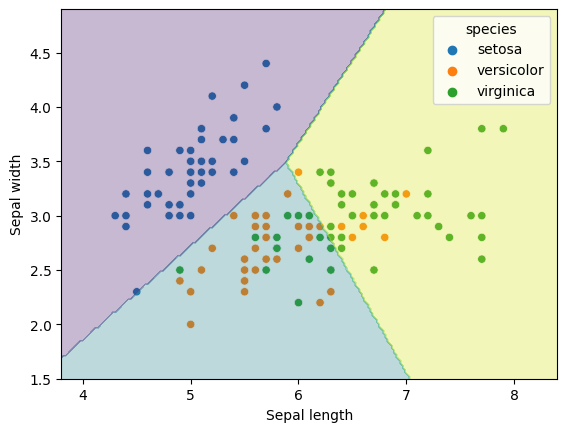

In [18]:
# Define the mesh grid for plotting
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class labels for the mesh grid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a dataframe of the input data and predicted labels
df = sns.load_dataset("iris").iloc[:, :2]
df['species'] = dataset.target_names[y]
df['predicted_species'] = dataset.target_names[model.predict(X)]

# Plot the data points and decision boundary using Seaborn and Matplotlib
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.viridis)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

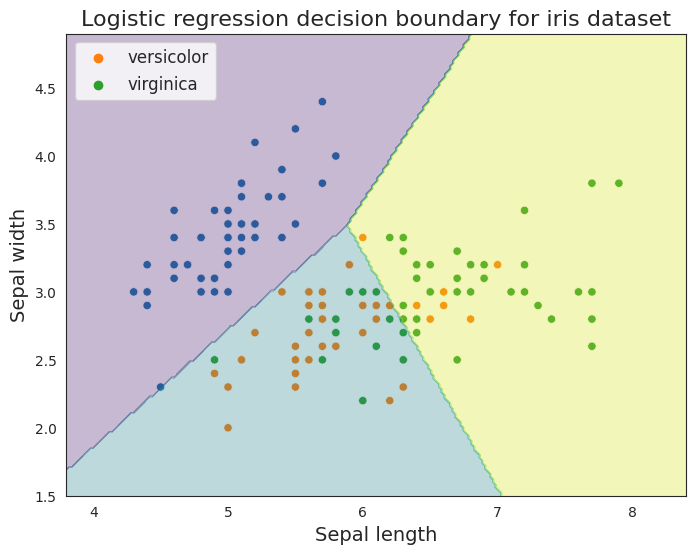

In [19]:
# Define the mesh grid for plotting
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class labels for the mesh grid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a dataframe of the input data and predicted labels
df = sns.load_dataset("iris").iloc[:, :2]
df['species'] = dataset.target_names[y]
df['predicted_species'] = dataset.target_names[model.predict(X)]

# Set Seaborn style and create figure and axes objects
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data points and decision boundary using Seaborn and Matplotlib
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', ax=ax)
ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.viridis)
ax.set_xlabel('Sepal length', fontsize=14)
ax.set_ylabel('Sepal width', fontsize=14)
ax.set_title('Logistic regression decision boundary for iris dataset', fontsize=16)

# Add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], loc='upper left', fontsize=12)

plt.show()